In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import dices
import yaml
import healpy as hp
import heracles
import camb
import camb.correlations
import skysegmentor
from camb.correlations import gauss_legendre_correlation as glc

In [2]:
with open("./dices_conf.yaml", mode="r") as file:
    config = yaml.safe_load(file)

In [3]:
POS1 = heracles.read_maps("gaussian_sims/gaussian_sim_1/POS_1.fits")
SHE1 = heracles.read_maps("gaussian_sims/gaussian_sim_1/SHE_1.fits")
POS2 = heracles.read_maps("gaussian_sims/gaussian_sim_1/POS_2.fits")
SHE2 = heracles.read_maps("gaussian_sims/gaussian_sim_1/SHE_2.fits")

In [4]:
lmax = config["bins"]["Lmax"]
ana_fast_maps = [
    POS1[("POS", 1)],
    SHE1[("SHE", 1)][0],
    SHE1[("SHE", 1)][1],
]
cls_ana = hp.anafast(ana_fast_maps, 
                     lmax=lmax,
                      use_pixel_weights=True)
_cls_ana = hp.anafast(ana_fast_maps)
pixwin = hp.pixwin(lmax, lmax=lmax)

[]

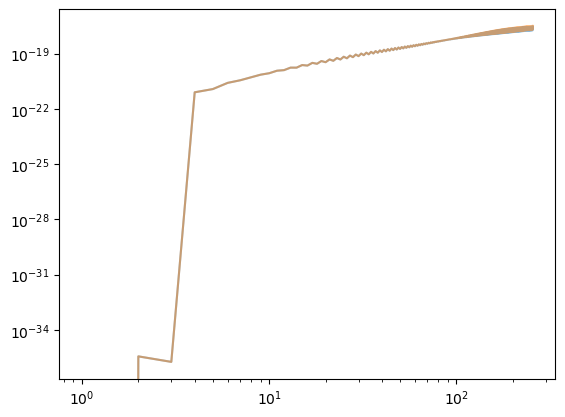

In [5]:
#plt.plot(_cls_ana[2])
plt.plot(cls_ana[2], alpha=0.5)
plt.plot(cls_ana[2]/pixwin**2, alpha=0.5)
#plt.plot(cls0["G_B", "G_B", 1, 1].__array__(), alpha=0.5)
plt.loglog()


In [6]:
"""
SHE1 = np.array([1000*SHE1[("SHE", 1)][0], SHE1[("SHE", 1)][1]])
SHE2 = np.array([1000*SHE2[("SHE", 2)][0], SHE2[("SHE", 2)][1]])

fsky = 1.0
wmean = 0.0
w2mean = 0.0
var = 0.0
variance = 0.0
bias = 0.0
npix = hp.nside2npix(config["Nside"])

ngal = np.sum(SHE1)
nbar = (ngal * wmean) / fsky / npix
heracles.update_metadata(SHE1,
                        ngal=ngal,
                        nbar=nbar,
                        wmean=wmean,
                        bias=bias,
                        var=var,
                        variance=variance,
                        neff=ngal/(2*np.pi*fsky),
                        fsky=fsky,
                        spin=2)

ngal = np.sum(SHE2)
nbar = (ngal * wmean) / fsky / npix
heracles.update_metadata(SHE2,
                        ngal=ngal,
                        nbar=nbar,
                        wmean=wmean,
                        bias=bias,
                        var=var,
                        variance=variance,
                        neff=ngal/(2*np.pi*fsky),
                        fsky=fsky,
                        spin=2)
"""

'\nSHE1 = np.array([1000*SHE1[("SHE", 1)][0], SHE1[("SHE", 1)][1]])\nSHE2 = np.array([1000*SHE2[("SHE", 2)][0], SHE2[("SHE", 2)][1]])\n\nfsky = 1.0\nwmean = 0.0\nw2mean = 0.0\nvar = 0.0\nvariance = 0.0\nbias = 0.0\nnpix = hp.nside2npix(config["Nside"])\n\nngal = np.sum(SHE1)\nnbar = (ngal * wmean) / fsky / npix\nheracles.update_metadata(SHE1,\n                        ngal=ngal,\n                        nbar=nbar,\n                        wmean=wmean,\n                        bias=bias,\n                        var=var,\n                        variance=variance,\n                        neff=ngal/(2*np.pi*fsky),\n                        fsky=fsky,\n                        spin=2)\n\nngal = np.sum(SHE2)\nnbar = (ngal * wmean) / fsky / npix\nheracles.update_metadata(SHE2,\n                        ngal=ngal,\n                        nbar=nbar,\n                        wmean=wmean,\n                        bias=bias,\n                        var=var,\n                        variance=varia

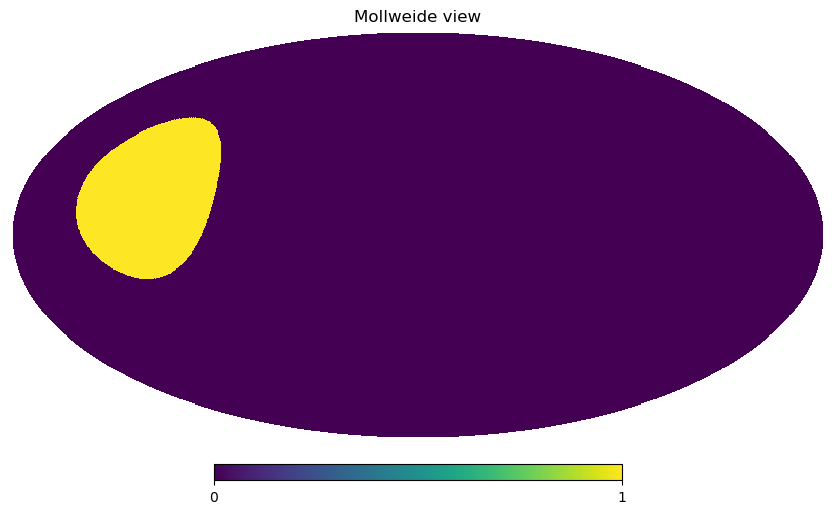

In [7]:
vmap = hp.read_map("./masks/vmap.fits")
r = hp.Rotator(coord=['G','E']) 
vmap = r.rotate_map_pixel(vmap)
vmap = np.abs(hp.ud_grade(vmap, config["Nside"]))
vmap[vmap <= 1] = 0.0
vmap[vmap != 0] = vmap[vmap != 0] / vmap[vmap != 0]
vmap[vmap == 0] = 2.0
vmap[vmap == 1] = 0.0
vmap[vmap == 2] = 1.0
hp.mollview(vmap)

In [8]:
data_maps = {}
data_maps[("POS", 1)] = POS1[("POS", 1)]*vmap
data_maps[("POS", 2)] = POS2[("POS", 2)]*vmap
data_maps[("SHE", 1)] = SHE1[("SHE", 1)]*vmap
data_maps[("SHE", 2)] = SHE2[("SHE", 2)]*vmap

vis_maps = {}
vis_maps[("VIS", 1)] = vmap #POS1[('POS', 1)] / POS1[('POS', 1)]
vis_maps[("VIS", 2)] = vmap #POS1[('POS', 1)] / POS1[('POS', 1)]
vis_maps[("WHT", 1)] = vmap #POS1[('POS', 1)] / POS1[('POS', 1)]
vis_maps[("WHT", 2)] = vmap #POS1[('POS', 1)] / POS1[('POS', 1)]

jk_maps = {}
for key in list(vis_maps.keys()):
    vmap = vis_maps[key]
    jk_maps[key] = skysegmentor.segmentmapN(vmap, config["Njk"])

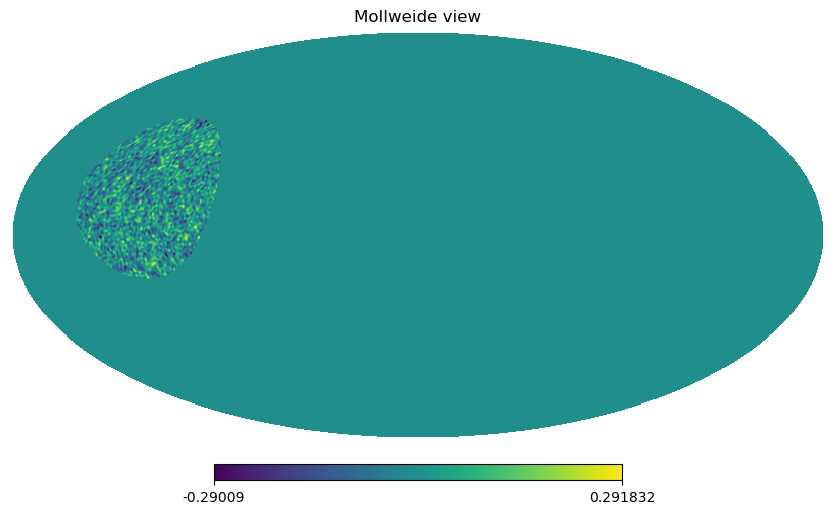

In [9]:
hp.mollview(data_maps[("POS", 1)])  

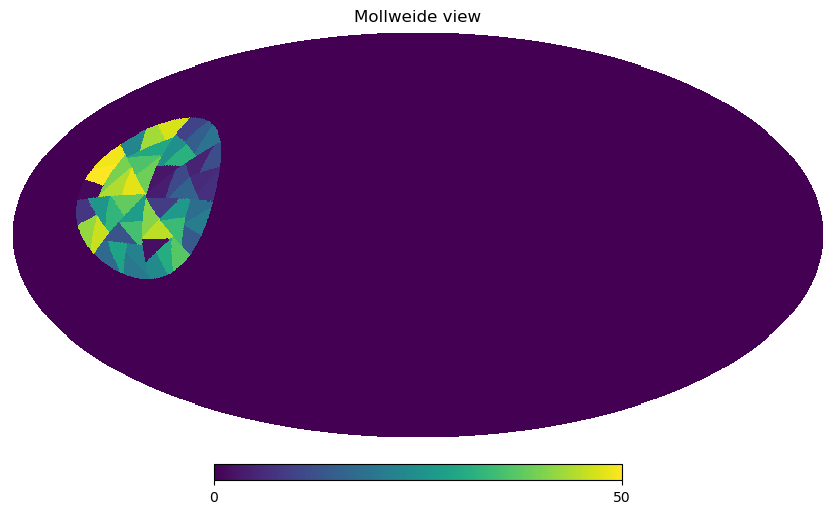

In [10]:
hp.mollview(jk_maps[("VIS", 1)])

In [11]:
DICESObj = dices.DICES(data_maps,
                       jk_maps,
                       vis_maps, 
                       config) 

In [44]:
DICESObj.data_cls = None
cls0, _ = DICESObj.get_cls()
for key in cls0.keys():
    cl = cls0[key].__array__()
    cls0[key] = heracles.Result(cl, DICESObj.ls)

In [13]:
# TO DO
# l factor to converge 

In [42]:
DICESObj.delete1_data_cls = None
cls1, _ = DICESObj.get_delete1_cls(mask_correction=False)

In [15]:
#for key in cls1.keys():
#    cls1[key]["SHE", "SHE", 1, 1].array[0, :] *= 10000
#    cls1[key]["SHE", "SHE", 1, 2].array[0, :] *= 10000
#    cls1[key]["SHE", "SHE", 2, 2].array[0, :] *= 10000
#    cls1[key]["POS", "SHE", 1, 1].array[0, :] *= 10000
#    cls1[key]["POS", "SHE", 1, 2].array[0, :] *= 10000
#    cls1[key]["POS", "SHE", 2, 2].array[0, :] *= 10000


In [16]:
DICESObj.bin = False
shrunk_cov1, cov1, target = DICESObj._get_delete1_cov(cls0, cls1)

/home/jaimerzp/anaconda3/envs/glass/lib/python3.13/site-packages/dices/utils_cl.py:276: RuntimeWarning: divide by zero encountered in divide
  corr /= np.outer(sig, sig)
/home/jaimerzp/anaconda3/envs/glass/lib/python3.13/site-packages/dices/utils_cl.py:276: RuntimeWarning: invalid value encountered in divide
  corr /= np.outer(sig, sig)
/home/jaimerzp/anaconda3/envs/glass/lib/python3.13/site-packages/dices/utils_sh.py:84: RuntimeWarning: invalid value encountered in scalar multiply
  T[i, j] = rbar[i, j] * np.sqrt(S[i, i] * S[j, j])


Shrinkage intensity not implemented for unbinned Cls
Shrinkage intensity = 0.0000


In [17]:
cls2, _ = DICESObj.get_delete2_cls(mask_correction=False)
#cls2 = cls1

In [40]:
cls2

{(1, 2): {('POS', 'POS', 1, 1): Result(axis=(0,)),
  ('POS', 'POS', 1, 2): Result(axis=(0,)),
  ('POS', 'G_E', 1, 1): Result(axis=(0,)),
  ('POS', 'G_B', 1, 1): Result(axis=(0,)),
  ('POS', 'G_E', 1, 2): Result(axis=(0,)),
  ('POS', 'G_B', 1, 2): Result(axis=(0,)),
  ('POS', 'POS', 2, 2): Result(axis=(0,)),
  ('POS', 'G_E', 2, 1): Result(axis=(0,)),
  ('POS', 'G_B', 2, 1): Result(axis=(0,)),
  ('POS', 'G_E', 2, 2): Result(axis=(0,)),
  ('POS', 'G_B', 2, 2): Result(axis=(0,)),
  ('G_E', 'G_E', 1, 1): Result(axis=(0,)),
  ('G_B', 'G_B', 1, 1): Result(axis=(0,)),
  ('G_E', 'G_B', 1, 1): Result(axis=(0,)),
  ('G_E', 'G_E', 1, 2): Result(axis=(0,)),
  ('G_B', 'G_B', 1, 2): Result(axis=(0,)),
  ('G_E', 'G_B', 1, 2): Result(axis=(0,)),
  ('G_E', 'G_B', 2, 1): Result(axis=(0,)),
  ('G_E', 'G_E', 2, 2): Result(axis=(0,)),
  ('G_B', 'G_B', 2, 2): Result(axis=(0,)),
  ('G_E', 'G_B', 2, 2): Result(axis=(0,))},
 (1, 3): {('POS', 'POS', 1, 1): Result(axis=(0,)),
  ('POS', 'POS', 1, 2): Result(axis=(

In [18]:
Q = DICESObj._get_delete2_correction(
    cls0,
    cls1,
    cls2,
)
cov2 = {}
for key in list(cov1.keys()):
    cov2[key] = cov1[key] - Q[key]
#cov2 = cov1

In [19]:
dices_cov = cov1 #DICESObj._get_dices_cov(cls0, shrunk_cov1, cov2)

In [47]:
cls0 = dices.compsep_Cls(cls0)
for key in list(cls1.keys()):
    cls1[key] = dices.compsep_Cls(cls1[key])
#for key in list(cls2.keys()):
#    cls2[key] = dices.compsep_Cls(cls2[key]) #cls1[key] 

In [48]:
_cls1 = {}
for key in list(cls1[1].keys()):
    _cls = []
    for i in range(1, DICESObj.JackNjk+1):
        cl = cls1[i][key]
        _cls.append(cl)
    _cls1[key] = np.array(_cls)

_cls2 = {}
for key in list(cls2[(1, 2)].keys()):
    _cls = []
    for i in range(1, DICESObj.JackNjk+1):
        for j in range(i+1, DICESObj.JackNjk+1):
            cl = cls2[(i, j)][key]
            _cls.append(cl)
    _cls2[key] = np.array(_cls)

#_cls2 = _cls1

cls1_m = {}
cls1_s = {}
cls2_m = {}
cls2_s = {}
for key in list(_cls1.keys()):
    cls1_m[key] = np.mean(_cls1[key], axis=0)
    cls1_s[key] = np.std(_cls1[key], axis=0)
    cls2_m[key] = np.mean(_cls2[key], axis=0)
    cls2_s[key] = np.std(_cls2[key], axis=0)

In [49]:
ls = DICESObj.ls
lgrid = DICESObj.lgrid

fl = -np.sqrt((ls+2)*(ls+1)*ls*(ls-1))
fl /= np.clip(ls*(ls+1), 1, None)

In [50]:
theory_cls = heracles.read("gaussian_sims/gaussian_sim_1/theory_cls.fits")
_theory_cls = {}
_theory_cls[("POS", "POS", 1, 1)] = theory_cls["W1xW1"]
_theory_cls[("POS", "POS", 2, 2)] = theory_cls["W2xW2"]
_theory_cls[("G_E", "G_E", 1, 1)] = theory_cls["W3xW3"].__array__()*fl**2
_theory_cls[("G_E", "G_E", 2, 2)] = theory_cls["W4xW4"].__array__()*fl**2
_theory_cls[("POS", "G_E", 1, 1)] = theory_cls["W1xW3"].__array__()*fl
_theory_cls[("POS", "G_E", 2, 2)] = theory_cls["W2xW4"].__array__()*fl
_theory_cls[("POS", "POS", 1, 2)] = theory_cls["W1xW2"]
_theory_cls[("POS", "G_E", 1, 2)] = theory_cls["W1xW4"].__array__()*fl
_theory_cls[("POS", "G_E", 2, 1)] = theory_cls["W2xW3"].__array__()*fl
_theory_cls[("G_E", "G_E", 1, 2)] = theory_cls["W3xW4"].__array__()*fl**2
for key in cls0.keys():
    if key not in _theory_cls:
        _theory_cls[key] = np.zeros_like(cls0[key])

In [51]:
Nbins = config["Fields"]["Nbins"]
__theory_gg = np.zeros((Nbins, Nbins, len(ls)))
__theory_gs = np.zeros((Nbins, Nbins, len(ls)))
__theory_ss = np.zeros((Nbins, Nbins, len(ls)))
for i in range(1, Nbins+1):
    for j in range(i, Nbins+1):
            __theory_gg[i-1, j-1, :] = _theory_cls[("POS", "POS", i, j)]
            __theory_gs[j-1, i-1, :] = _theory_cls[("POS", "POS", i, j)]

            __theory_gs[i-1, j-1, :] = _theory_cls[("POS", "G_E", i, j)]
            __theory_gs[j-1, i-1, :] = _theory_cls[("POS", "G_E", i, j)]

            __theory_ss[i-1, j-1, :] = _theory_cls[("G_E", "G_E", i, j)]
            __theory_ss[j-1, i-1, :] = _theory_cls[("G_E", "G_E", i, j)]

In [52]:
ensemble_cls = heracles.read("gaussian_sims/mean_cls.fits")
ensemble_cov = heracles.read("gaussian_sims/cov_cls.fits") 

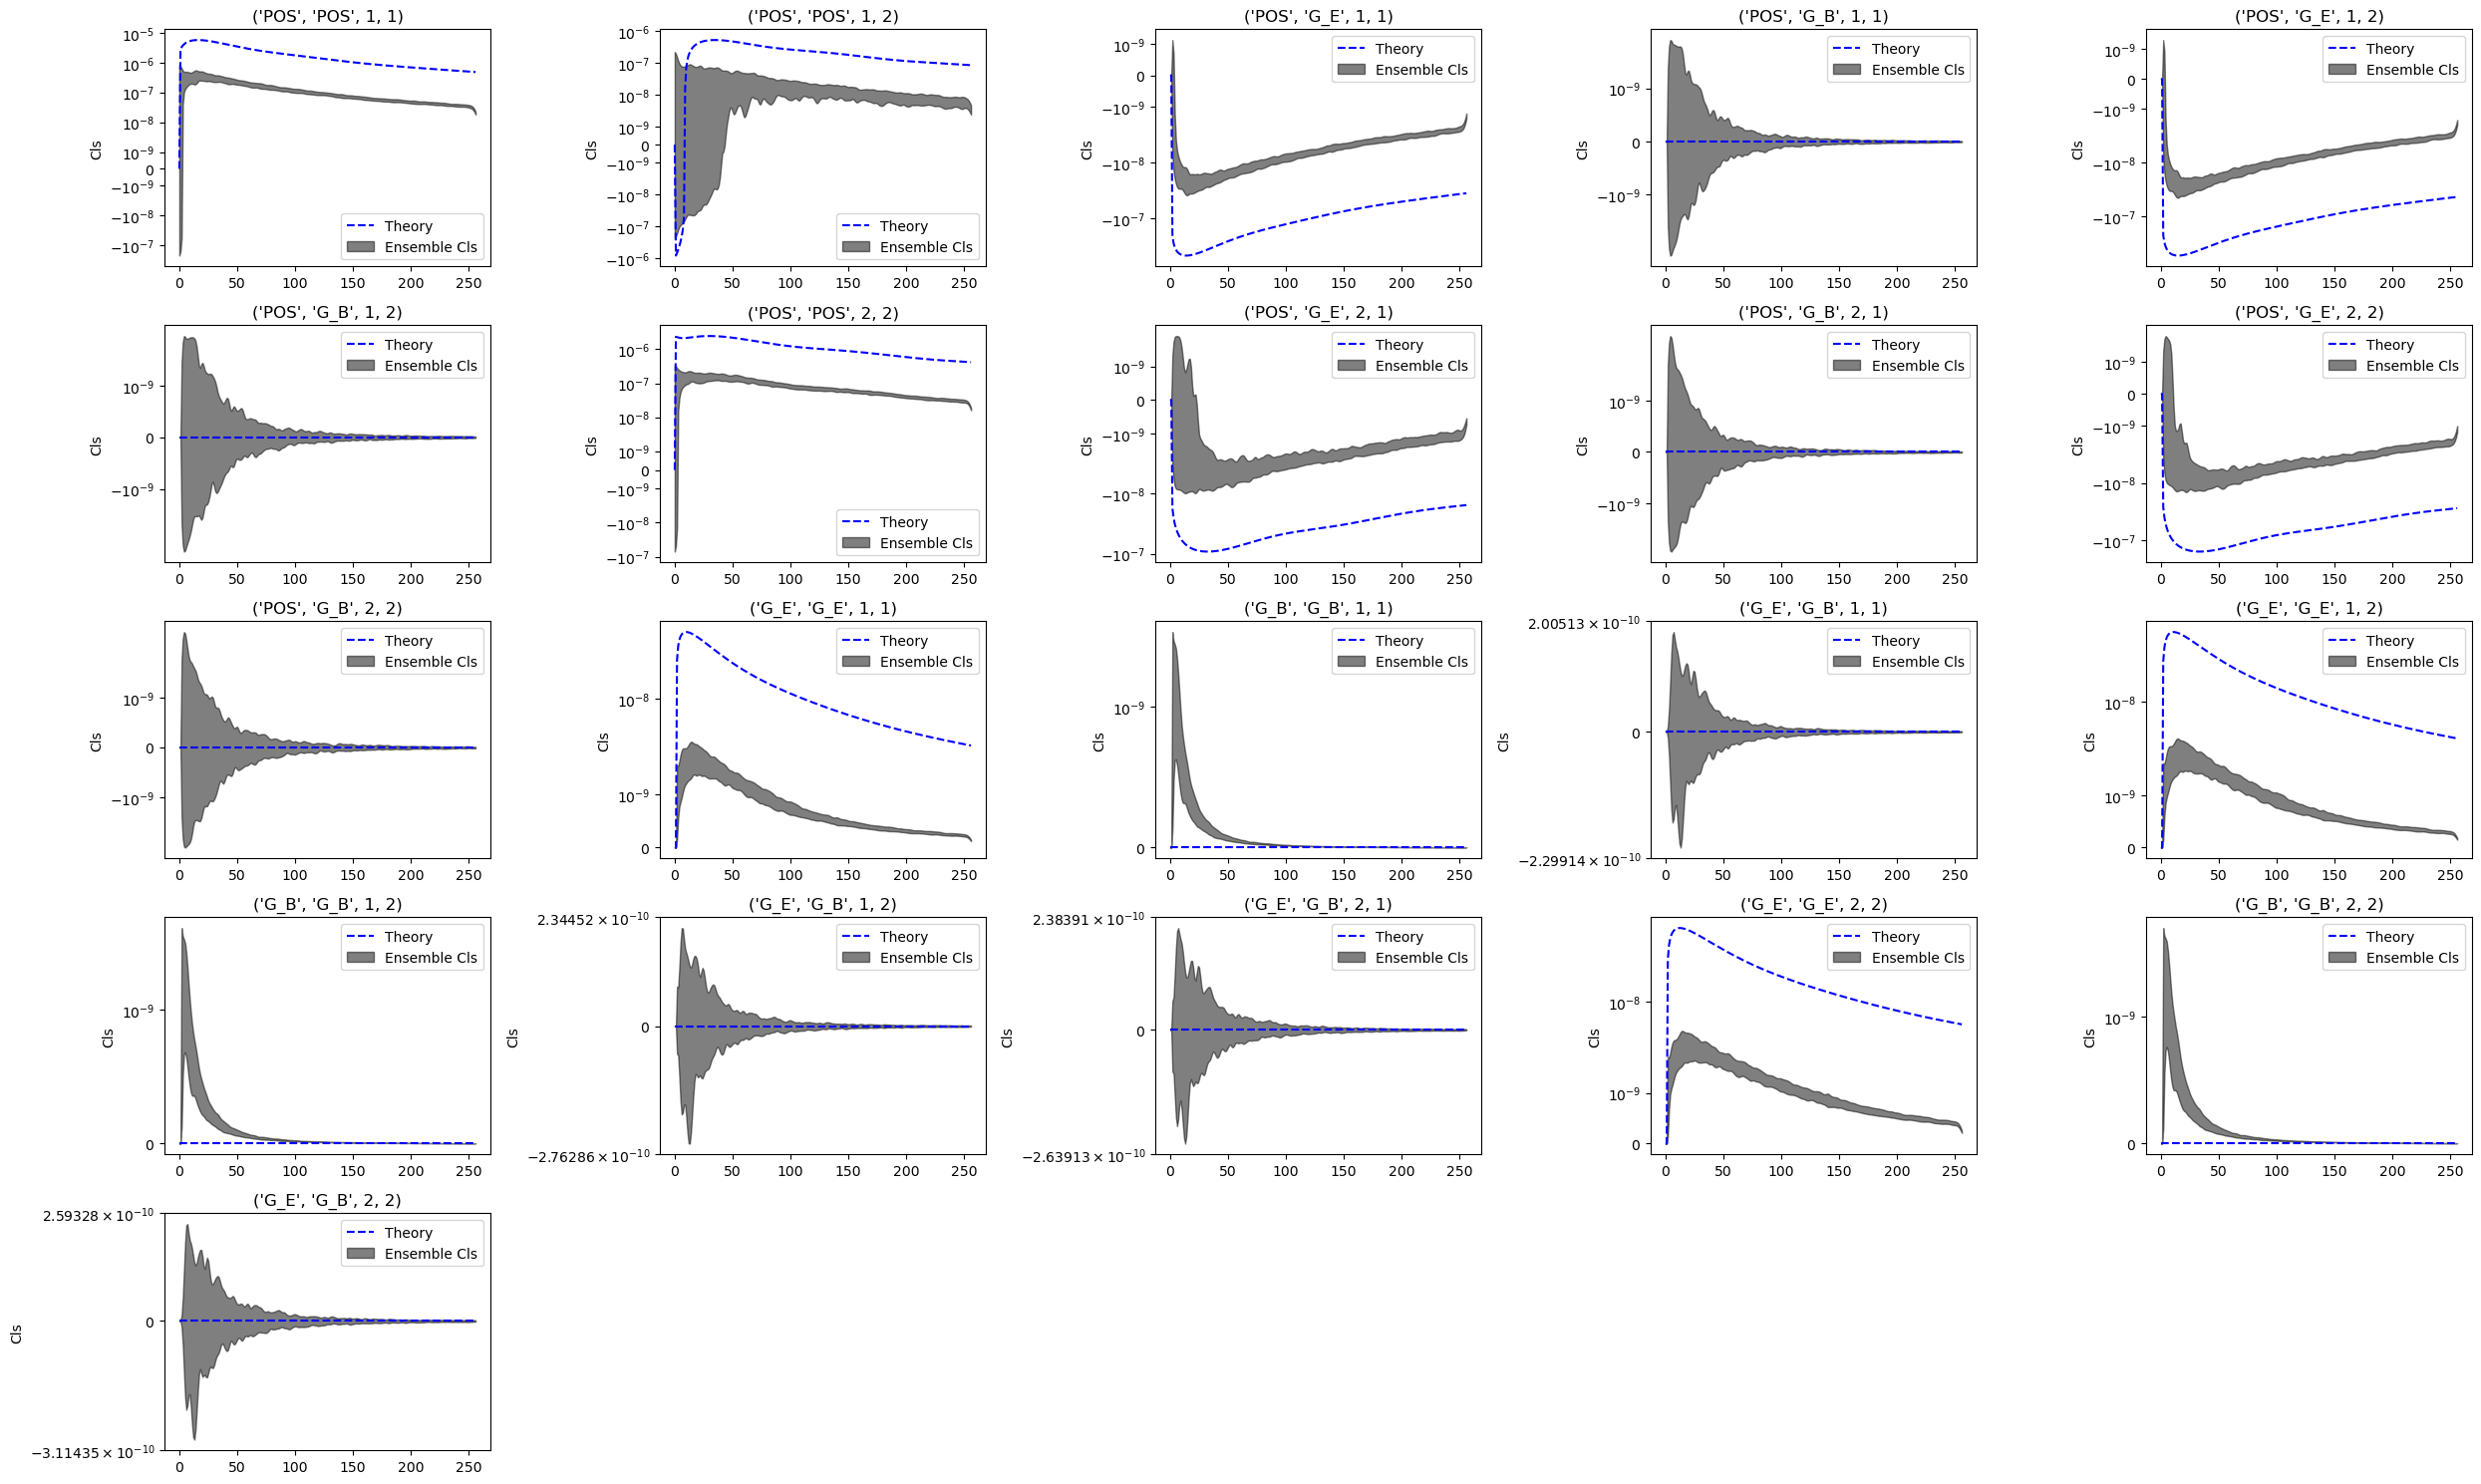

In [53]:
# Determine the number of subplots needed
num_plots = len(cls1_m)
num_cols = math.ceil(math.sqrt(num_plots))
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 15))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each Cls with error bars
for (ax, key) in zip(axes, cls1_m.keys()):
    a, b, na, nb = key
    _vcl = _theory_cls[key]
    _cl = ensemble_cls[key]
    err = np.sqrt(np.diag(ensemble_cov[key]))
    ax.plot(ls, _vcl, 'b--', alpha=1.0, label='Theory')
    ax.fill_between(ls, _cl-err, _cl+err, color="k", alpha=0.5, label='Ensemble Cls')
    ax.legend()
    ax.set_title(f'{key}')
    ax.set_ylabel('Cls')
    ax.set_yscale('symlog', linthresh=1e-9, linscale=0.5)

# Hide any unused subplots
for ax in axes[len(cls1_m):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

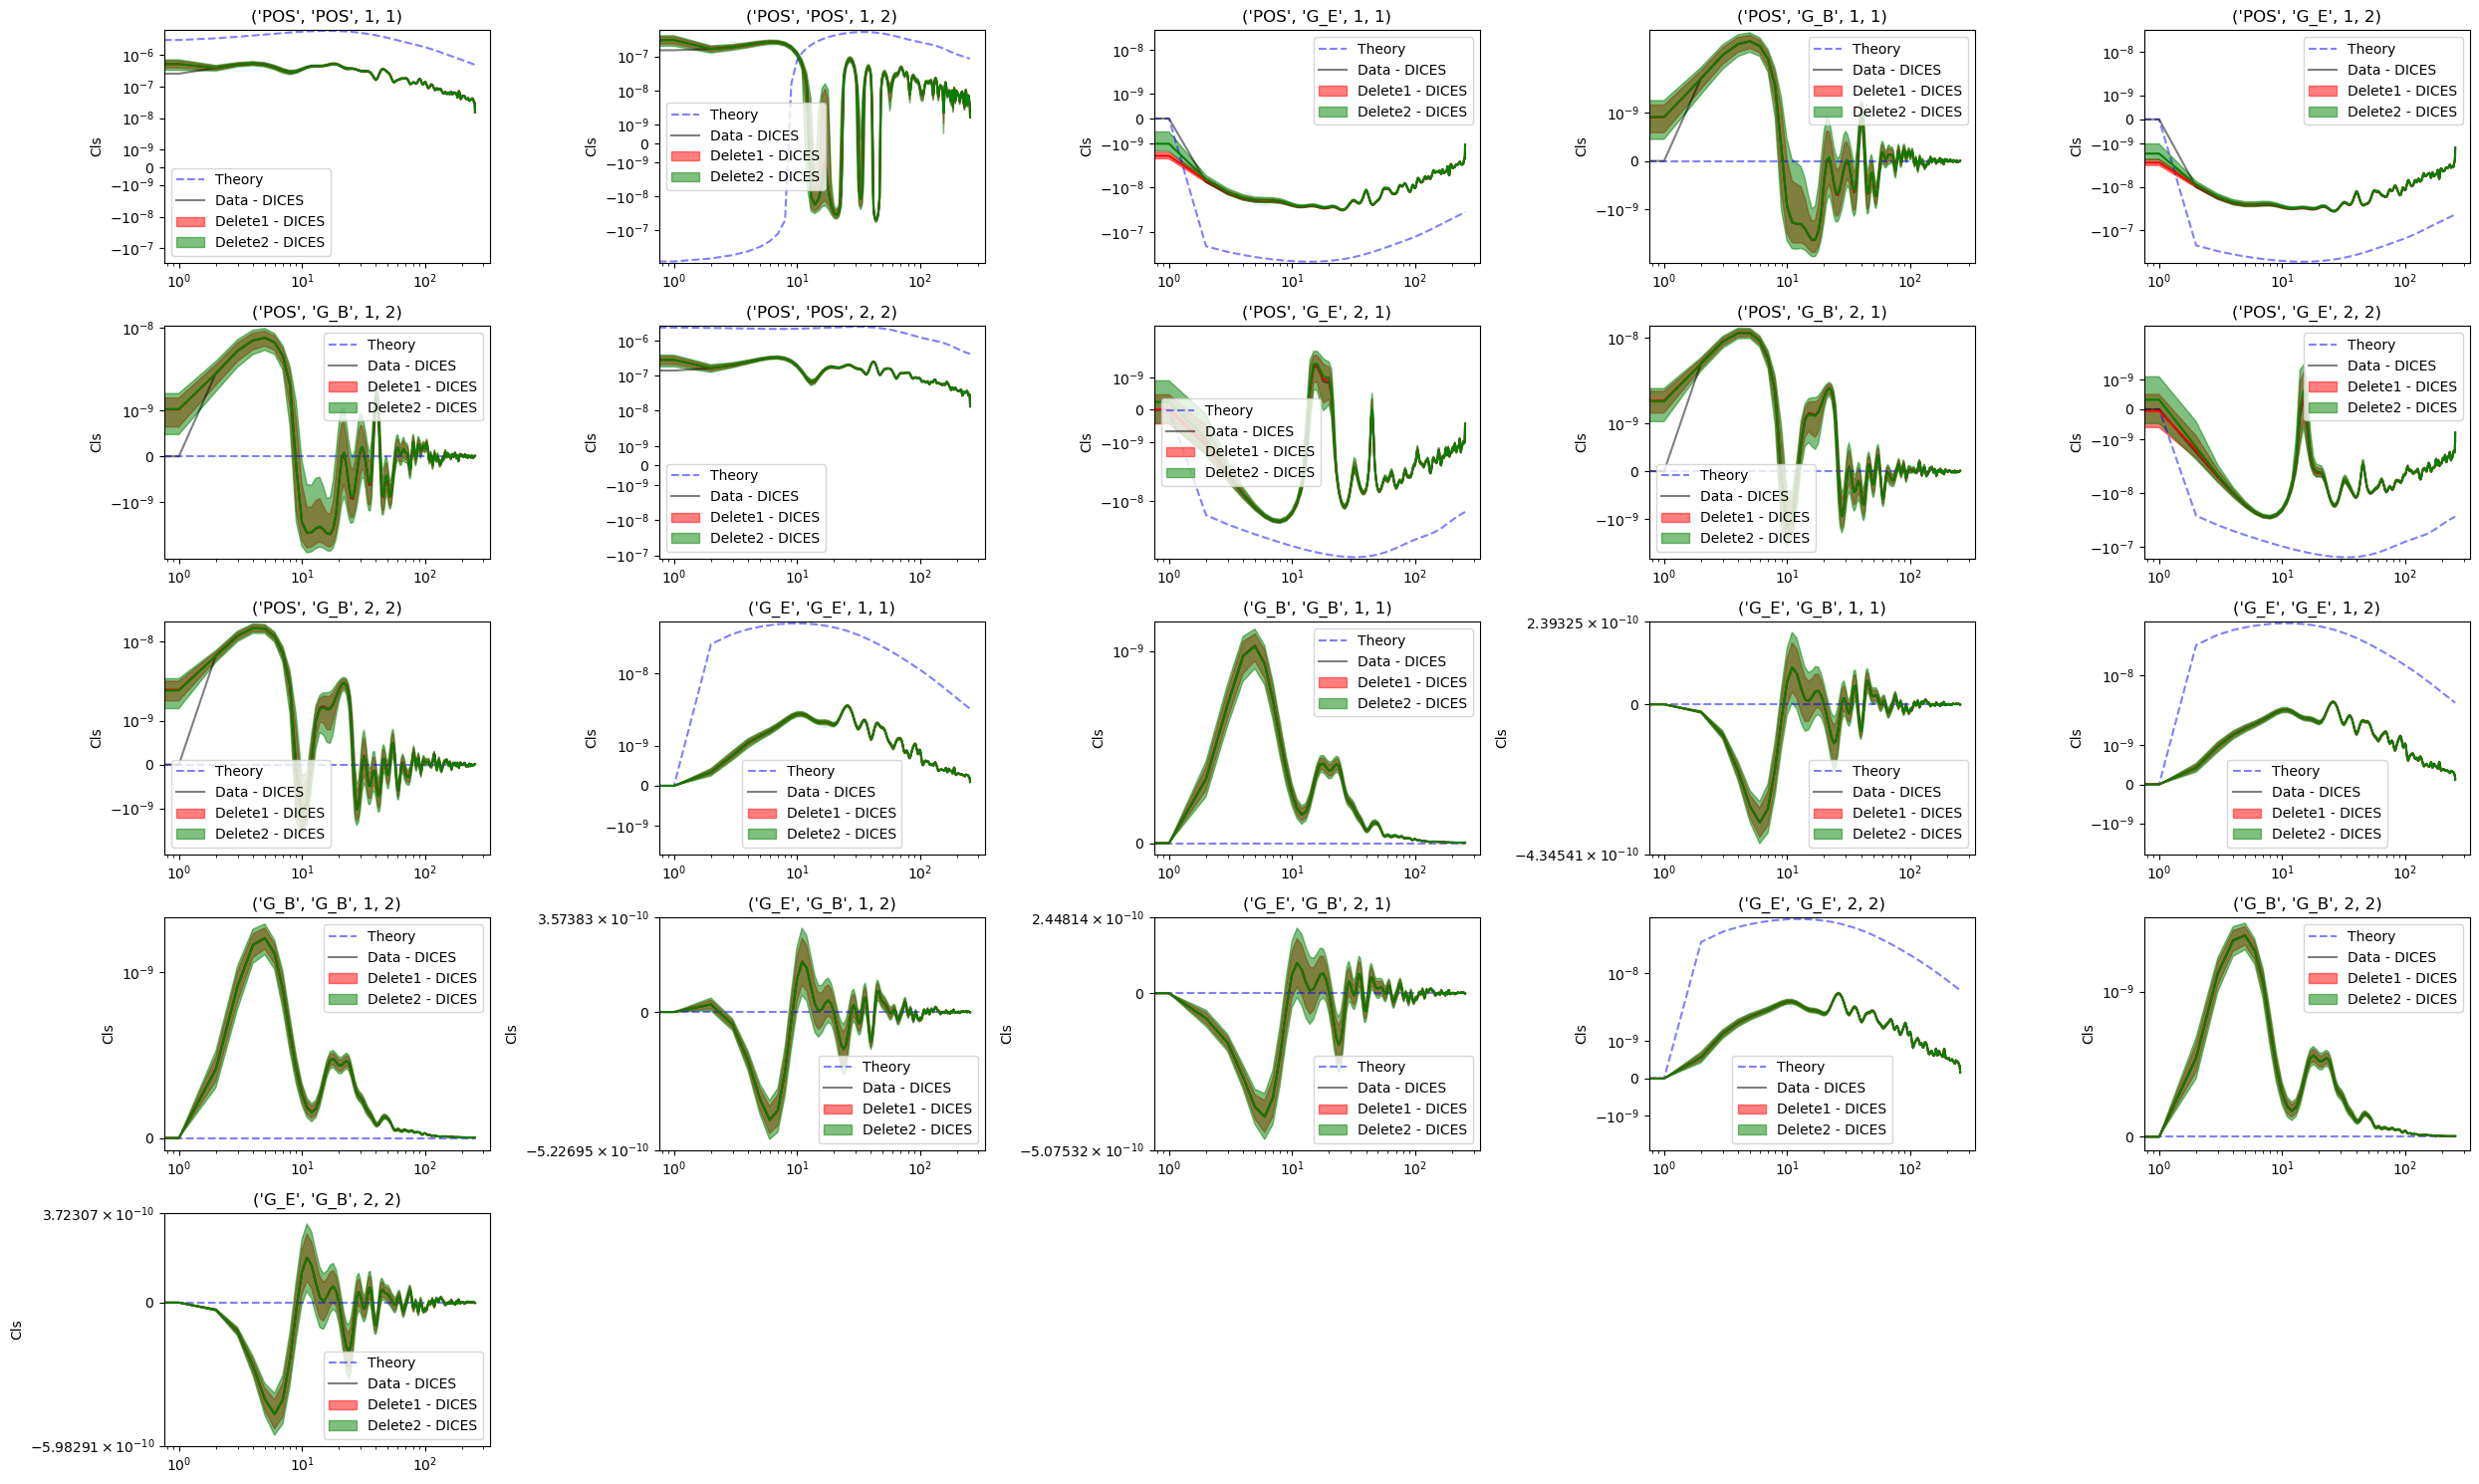

In [54]:
# Determine the number of subplots needed
num_plots = len(cls1_m)
num_cols = math.ceil(math.sqrt(num_plots))
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 15))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each Cls with error bars
for (ax, key) in zip(axes, cls1_m.keys()):
    a, b, na, nb = key
    _vcl = _theory_cls[key]
    _cl = cls0[key]
    cl1m = cls1_m[key]
    cl1s = cls1_s[key]
    cl2m = cls2_m[key]
    cl2s = cls2_s[key]
    ax.plot(ls, _vcl, 'b--', alpha=0.5, label='Theory')
    ax.plot(ls, _cl, 'k-', alpha=0.5, label='Data - DICES')
    ax.plot(ls, cl1m, 'r-')
    ax.fill_between(ls, cl1m - cl1s, cl1m + cl1s, color='r', alpha=0.5, label='Delete1 - DICES')
    ax.plot(ls, cl2m, 'g-')
    ax.fill_between(ls, cl2m - cl2s, cl2m + cl2s, color='g', alpha=0.5, label='Delete2 - DICES')
    ax.legend()
    ax.set_title(f'{key}')
    ax.set_ylabel('Cls')
    ax.set_xscale('log')
    ax.set_yscale('symlog', linthresh=1e-9, linscale=0.5)

# Hide any unused subplots
for ax in axes[len(cls1_m):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

/tmp/ipykernel_89958/4215018842.py:23: RuntimeWarning: invalid value encountered in sqrt
  c2err = np.sqrt(np.diag(c2))


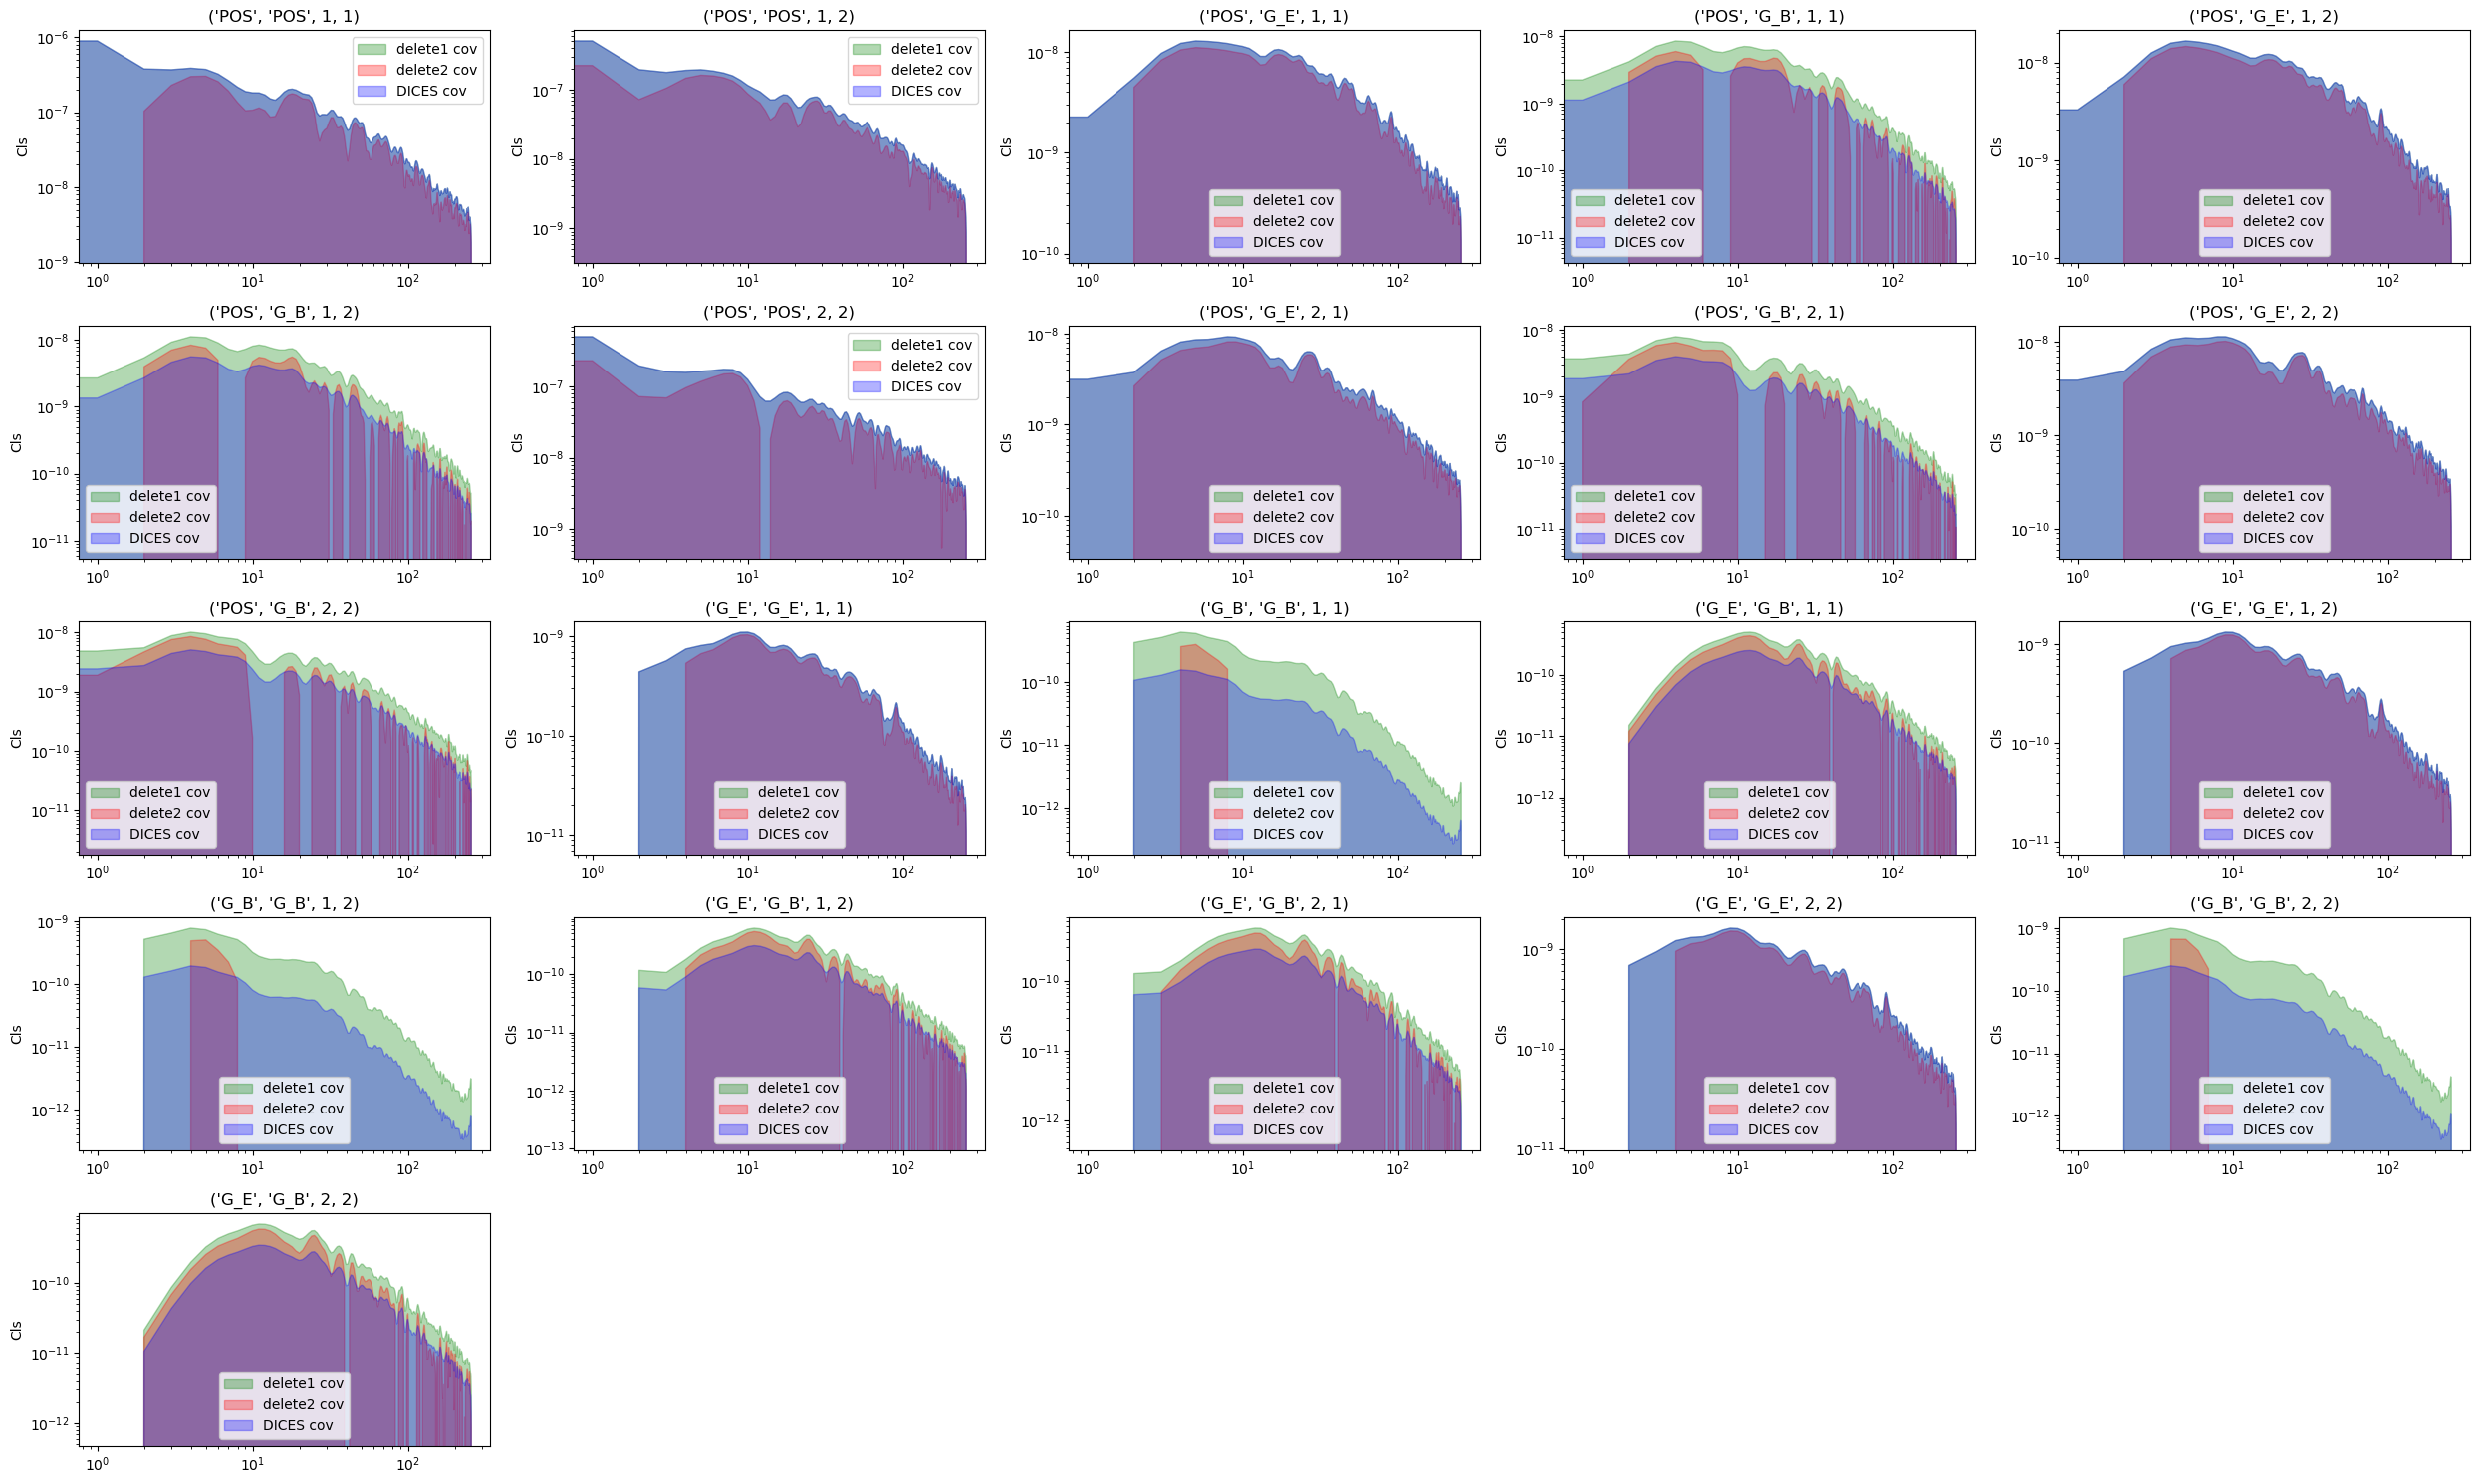

In [55]:
# Determine the number of subplots needed
num_plots = len(cls1_m)
num_cols = math.ceil(math.sqrt(num_plots))
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 15))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each Cls with error bars
for ax, (key, value) in zip(axes, cls1_m.items()):
    f1, f2, b1, b2 = key
    kk = (f1, f2, f1, f2, b1, b2, b1, b2)
    _vcl = _theory_cls[key].__array__()
    c = cov1[kk]
    sc = shrunk_cov1[kk]
    c2 = cov2[kk]
    dc = dices_cov[kk]
    #vc = vcov[kk]
    err = np.sqrt(np.diag(c))
    serr = np.sqrt(np.diag(sc))
    c2err = np.sqrt(np.diag(c2))
    dcerr = np.sqrt(np.diag(dc))
    #verr = np.sqrt(vc)
    if f1 == "G_B":
        dcerr /= 2
    if f2 == "G_B":
        dcerr /= 2
    #ax.plot(ls, verr, 'k--', lw=3,label='Gaussian Error w/ bias')
    ax.fill_between(ls, np.zeros_like(ls), err, color='green', alpha=0.3, label='delete1 cov')
    ax.fill_between(ls, np.zeros_like(ls), c2err, color='red', alpha=0.3, label='delete2 cov')
    ax.fill_between(ls, np.zeros_like(ls), dcerr, color='blue', alpha=0.3, label='DICES cov')
    
    ax.set_title(f'{key}')
    ax.legend()
    ax.set_ylabel('Cls')
    ax.loglog()

# Hide any unused subplots
for ax in axes[len(cls1_m):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

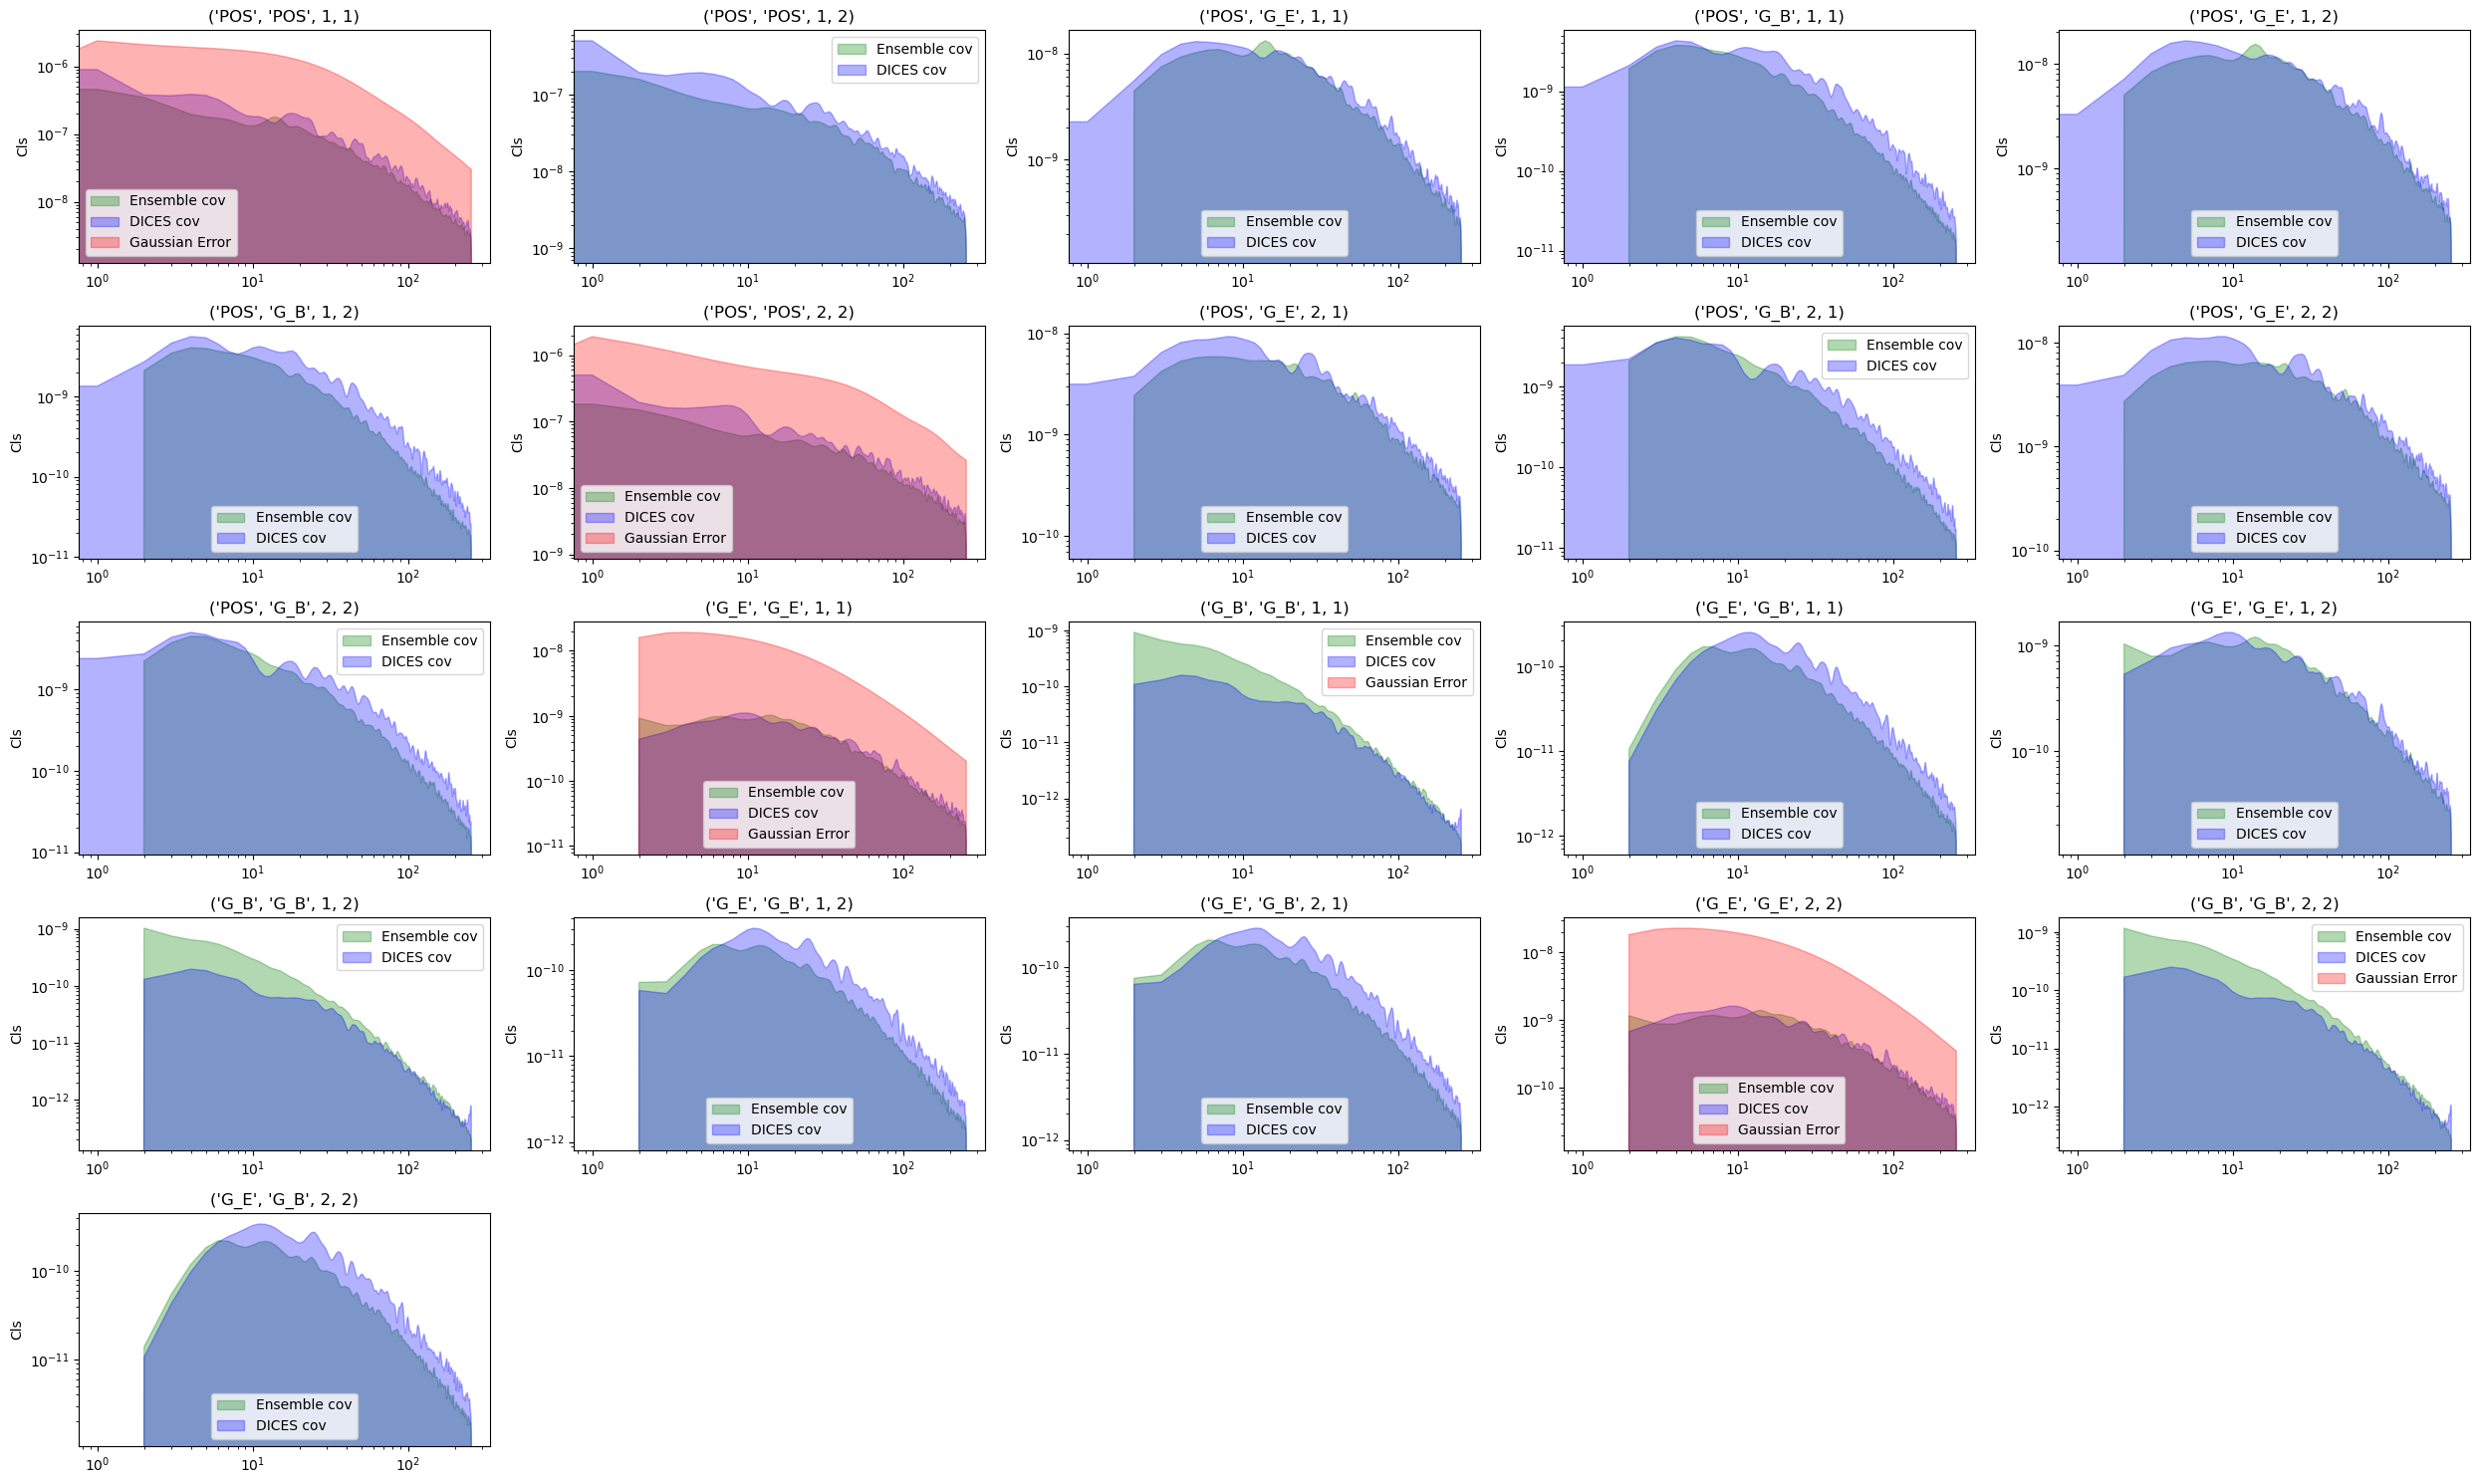

In [56]:
# Determine the number of subplots needed
num_plots = len(cls1_m)
num_cols = math.ceil(math.sqrt(num_plots))
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 15))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each Cls with error bars
for ax, (key, value) in zip(axes, cls1_m.items()):
    f1, f2, b1, b2 = key
    kk = (f1, f2, f1, f2, b1, b2, b1, b2)
    _vcl = _theory_cls[key].__array__()
    dc = dices_cov[kk]
    ens_err = np.sqrt(np.diag(ensemble_cov[key]))
    dcerr = np.sqrt(np.diag(dc))
    if f1 == "G_B":
        dcerr /= 2
    if f2 == "G_B":
        dcerr /= 2
    ax.fill_between(ls, np.zeros_like(ls), ens_err, color='green', alpha=0.3, label='Ensemble cov')
    ax.fill_between(ls, np.zeros_like(ls), dcerr, color='blue', alpha=0.3, label='DICES cov')
    if (f1, b1) == (f2, b2):
        ax.fill_between(ls, np.zeros_like(ls), np.sqrt((2*_vcl**2)/(2*ls+1)), color='red', alpha=0.3, label='Gaussian Error')
    
    ax.set_title(f'{key}')
    ax.legend()
    ax.set_ylabel('Cls')
    ax.loglog()
    #ax.set_ylim(1e-12, 1e-5)

# Hide any unused subplots
for ax in axes[len(cls1_m):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

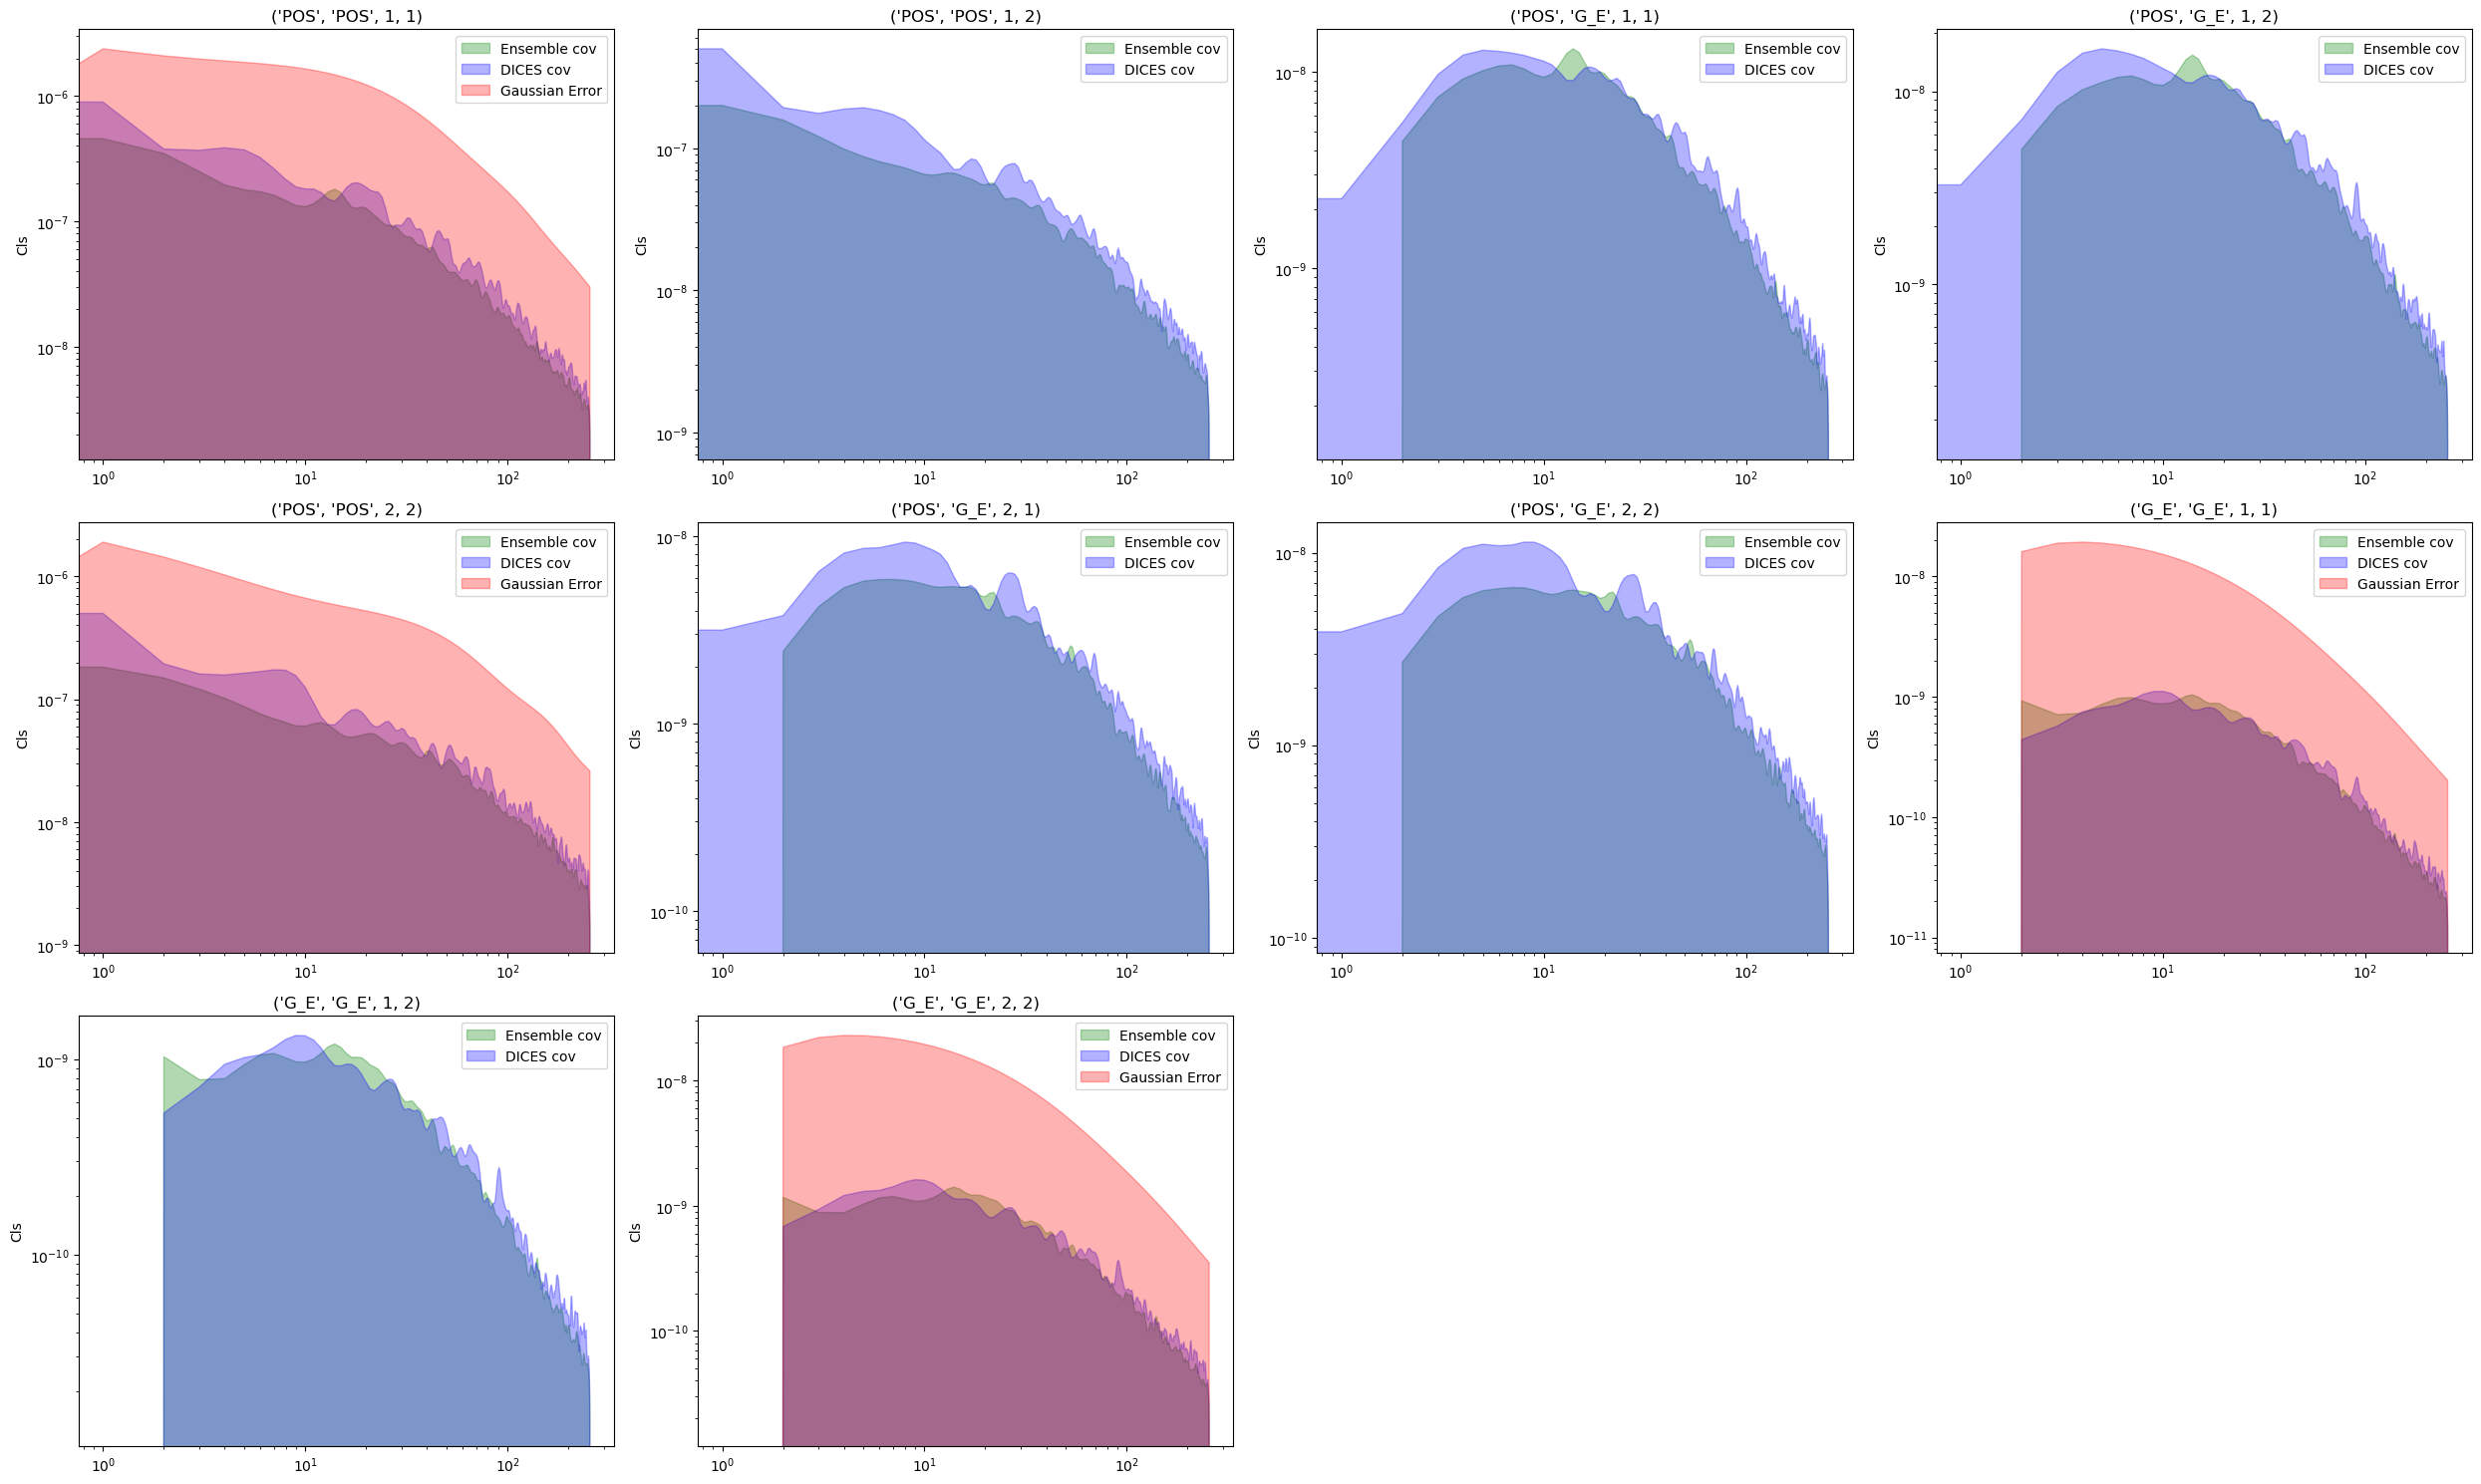

In [57]:
# Determine the number of subplots needed
filtered_keys = [key for key in cls1_m.keys() if 'G_B' not in key]
num_plots = len(filtered_keys)
num_cols = math.ceil(math.sqrt(num_plots))
num_rows = math.ceil(num_plots / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(25, 15))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each Cls with error bars
for ax, key in zip(axes, filtered_keys):
    f1, f2, b1, b2 = key
    kk = (f1, f2, f1, f2, b1, b2, b1, b2)
    _vcl = _theory_cls[key].__array__()
    dc = dices_cov[kk]
    ens_err = np.sqrt(np.diag(ensemble_cov[key]))
    dcerr = np.sqrt(np.diag(dc))
    ax.fill_between(ls, np.zeros_like(ls), ens_err, color='green', alpha=0.3, label='Ensemble cov')
    ax.fill_between(ls, np.zeros_like(ls), dcerr, color='blue', alpha=0.3, label='DICES cov')
    if (f1, b1) == (f2, b2):
        ax.fill_between(ls, np.zeros_like(ls), np.sqrt((2*_vcl**2)/(2*ls+1)), color='red', alpha=0.3, label='Gaussian Error')
    
    ax.set_title(f'{key}')
    ax.legend()
    ax.set_ylabel('Cls')
    ax.loglog()

# Hide any unused subplots
for ax in axes[len(filtered_keys):]:
    ax.axis('off')

plt.tight_layout()
plt.show()